## Problème : Arbre de décision/Foret d’isolement et réduction de dimension :



---
Done by :
*ELMAHFOUD Radouane*

 

### Question 1

L'arbre de décision est l'un des algorithmes les plus puissants et les plus populaires. L'algorithme de l'arbre de décision fait partie de la catégorie des algorithmes d'apprentissage supervisé. Il fonctionne à la fois pour les variables de sortie continues et catégorielles.

In [1]:
import pandas as pd

df = pd.read_csv("Income_Inequality.csv", sep=";")
df

,Country,Year,Income_Inequality,Eco1,Eco2,Eco3,Energy1,Energy2,Energy3,Health1,...,Finan2,Finan3,Finan4,Finan5,Governance,Poverty,Env,Other1,Other2,Other3
0,1,2010,H,2993.420974,2856.690347,4891.381959,3,34.895638,159.0,120.0,...,8.701985e+05,0.530905,1.417133,0.308318,-1.142090,52.796799,0.975917,38.162310,36.54,3.42132
1,1,2011,H,2983.032611,3528.955738,6041.854230,5,34.599998,159.0,112.2,...,9.996368e+05,0.673295,1.424196,0.375211,-1.197987,53.315817,0.983787,39.022678,36.49,3.03000
2,1,2012,H,3118.343699,4013.387617,6584.963632,5,37.131321,145.0,104.9,...,1.057144e+06,0.671585,1.431295,0.414552,-0.990930,53.875463,0.947583,34.731008,36.60,3.08191
3,1,2013,H,3152.704327,4737.956274,7073.847072,5,38.278030,145.0,98.3,...,1.053465e+06,0.667456,1.438429,0.437974,-1.246630,54.555794,1.031044,29.400045,35.92,4.43895
4,1,2014,H,3185.122401,5360.889146,7766.977359,9,32.000000,145.0,92.9,...,1.162079e+06,0.622806,1.445598,0.449489,-1.055084,54.933176,1.091497,22.124248,34.53,3.12292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,87,2015,H,1307.909649,2330.101781,3591.299118,15,31.100000,117.0,68.2,...,2.444751e+05,0.390127,2.501791,0.296361,-0.612142,65.045688,0.305055,11.160253,32.99,4.62433
866,87,2016,H,1315.250562,2354.389942,3437.395432,23,35.425453,117.0,65.3,...,2.587091e+05,0.376191,2.561215,0.296417,-0.704611,65.299678,0.316995,11.677213,0.00,3.74792
867,87,2017,H,1319.607777,2168.492691,3292.797710,30,40.299999,117.0,64.2,...,2.546287e+05,0.440513,2.602425,0.294922,-0.671801,66.037969,0.393726,13.226440,0.00,3.72964
868,87,2018,H,1331.449244,2009.313408,3062.692688,30,40.317890,117.0,64.2,...,2.685542e+05,0.420487,2.644298,0.269370,-0.624778,66.749841,0.440527,11.748346,0.00,4.73975


In [2]:
statistiques_descriptives = df.describe().T
statistiques_descriptives


,count,mean,std,min,25%,50%,75%,max
Country,870.0,4.400000e+01,2.512752e+01,1.000000,22.000000,4.400000e+01,6.600000e+01,8.700000e+01
Year,870.0,2.014500e+03,2.873933e+00,2010.000000,2012.000000,2.014500e+03,2.017000e+03,2.019000e+03
Eco1,870.0,1.608159e+04,1.974010e+04,270.137283,2389.422744,6.285758e+03,2.234033e+04,8.712366e+04
Eco2,870.0,1.563012e+04,1.198748e+04,757.988196,4977.647995,1.178683e+04,2.513085e+04,5.113349e+04
Eco3,870.0,2.154380e+04,1.841850e+04,847.617130,6155.093654,1.457784e+04,3.420322e+04,9.224558e+04
Energy1,870.0,5.190460e+01,2.381268e+01,1.000000,37.000000,5.600000e+01,7.100000e+01,9.200000e+01
Energy2,870.0,8.518011e+01,2.658898e+01,5.300000,87.133728,9.971045e+01,1.000000e+02,1.000000e+02
Energy3,870.0,9.122605e+01,5.151618e+01,13.000000,55.000000,8.095000e+01,1.130000e+02,2.880000e+02
Health1,870.0,2.719460e+01,3.268411e+01,2.300000,4.800000,1.445000e+01,3.502500e+01,1.614000e+02
Health2,870.0,2.639169e+00,1.400614e+00,0.918000,1.620000,2.053500e+00,3.100000e+00,7.485000e+00


In [3]:
varriables_quantitatives = df.select_dtypes(include=['float64', 'int64'])

variance = varriables_quantitatives.var()
statistiques_descriptives['Variance'] = variance


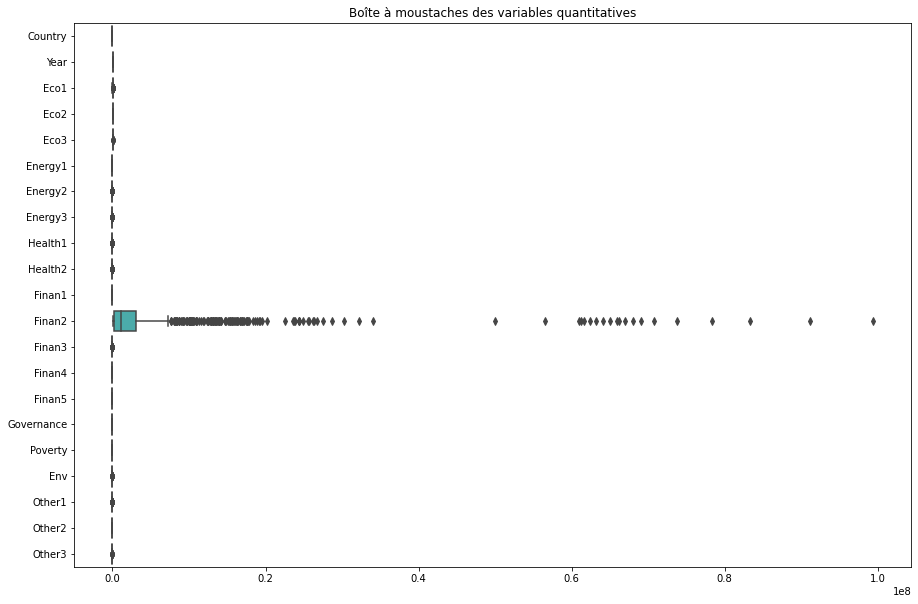

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.boxplot(data=varriables_quantitatives, orient="h")
plt.title('Boîte à moustaches des variables quantitatives')
plt.show()

In [5]:
print(statistiques_descriptives)

            count          mean           std           min            25%  \
Country     870.0  4.400000e+01  2.512752e+01      1.000000      22.000000   
Year        870.0  2.014500e+03  2.873933e+00   2010.000000    2012.000000   
Eco1        870.0  1.608159e+04  1.974010e+04    270.137283    2389.422744   
Eco2        870.0  1.563012e+04  1.198748e+04    757.988196    4977.647995   
Eco3        870.0  2.154380e+04  1.841850e+04    847.617130    6155.093654   
Energy1     870.0  5.190460e+01  2.381268e+01      1.000000      37.000000   
Energy2     870.0  8.518011e+01  2.658898e+01      5.300000      87.133728   
Energy3     870.0  9.122605e+01  5.151618e+01     13.000000      55.000000   
Health1     870.0  2.719460e+01  3.268411e+01      2.300000       4.800000   
Health2     870.0  2.639169e+00  1.400614e+00      0.918000       1.620000   
Finan1      870.0  4.083050e-01  2.556808e-01      0.034581       0.180725   
Finan2      870.0  4.849812e+06  1.139902e+07  11769.927734  236

### Question 2

In [6]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np

RandomForestClassifier
np.random.seed(1234)

X = df.drop('Income_Inequality', axis=1)
y = df['Income_Inequality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1234)

In [7]:
y_test = np.where(np.array(y_test) == 'H', 1, 0)
y_train = np.where(np.array(y_train) == 'H', 1, 0)

In [8]:
X_train.shape,X_test.shape

((609, 21), (261, 21))

In [9]:
y_train.shape,y_test.shape

((609,), (261,))

In [10]:
# Définir les paramètres pour la recherche par grille
param_grid = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
}

# Créer le modèle d'arbre de décision
dt = DecisionTreeClassifier()

# Recherche des hyper-paramètres avec validation croisée
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


Meilleurs paramètres: {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [11]:
# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Évaluer la performance
accuracy = accuracy_score(y_test, y_pred)
print("Précision:", accuracy)


Précision: 0.9310344827586207


Dans notre cas, la précision du modèle sur l'ensemble de test est d'environ 94%, ce qui semble être une performance solide. Néanmoins, la précision seule ne fournit pas toujours une image complète de la performance.

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        90
           1       0.95      0.94      0.95       171

    accuracy                           0.93       261
   macro avg       0.92      0.93      0.92       261
weighted avg       0.93      0.93      0.93       261



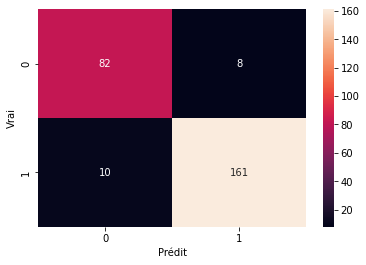

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Précision, rappel, score F1
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()


1)Précision (Precision) :

Pour la classe 0 (L : niveau faible d'inégalités des revenus), la précision est de 0.92. Cela signifie que parmi toutes les instances prédites comme appartenant à la classe 0, 92% étaient correctes.
Pour la classe 1 (H : niveau élevé d'inégalités des revenus), la précision est de 0.96. Cela signifie que parmi toutes les instances prédites comme appartenant à la classe 1, 96% étaient correctes.
En général, la précision mesure la capacité du modèle à éviter de faire de fausses prédictions positives.
2)Rappel(Recall) :

Pour la classe 0 (L : niveau faible d'inégalités des revenus), le rappel est de 0.93. Cela signifie que parmi toutes les instances réelles de la classe 0, 93% ont été correctement prédites par le modèle.
Pour la classe 1 (H : niveau élevé d'inégalités des revenus) , le rappel est de 0.96. Cela signifie que parmi toutes les instances réelles de la classe 1, 96% ont été correctement prédites par le modèle.
Le rappel mesure la capacité du modèle à capturer toutes les instances réelles d'une classe.

3)Score F1 (F1-score) :

Le score F1 est la moyenne harmonique de la précision et du rappel. Il donne une mesure équilibrée entre précision et rappel.
Un score F1 élevé indique une bonne performance du modèle, en particulier lorsque les classes sont déséquilibrées.
4)Support :

Le support représente le nombre d'instances réelles dans chaque classe.

5)Exactitude (Accuracy) :

L'exactitude globale du modèle est de 0.95, ce qui signifie que 95% de toutes les prédictions sont correctes.

6)Macro avg et Weighted avg :

La moyenne macro (macro avg) calcule la moyenne non pondérée des métriques par classe.
La moyenne pondérée (weighted avg) calcule la moyenne pondérée des métriques par le nombre d'instances dans chaque classe. Cela peut être particulièrement utile si les classes sont déséquilibrées

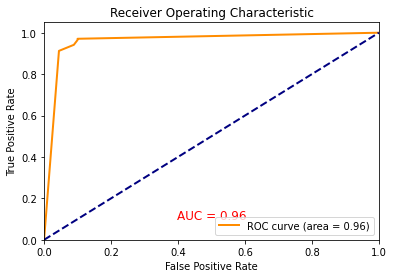

In [13]:
# scores de probabilité
y_scores = best_model.predict_proba(X_test)[:, 1]

# taux de vrais et faux positifs
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC
roc_auc = auc(fpr, tpr)

# ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# Ajouter la valeur de l'AUC
plt.text(0.5, 0.1, 'AUC = %0.2f' % roc_auc, ha='center', color='red', fontsize=12)

plt.show()



Un AUC de 0.94 indique que le modèle a un taux élevé de vrais positifs par rapport aux faux positifs sur l'ensemble de la plage des seuils de décision, ce qui suggère une forte capacité de discrimination. 

### Question 3

#### a) b)

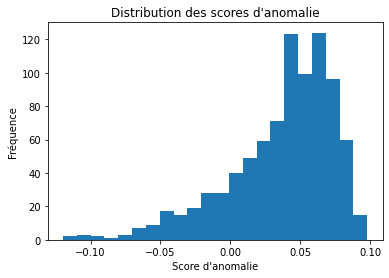

In [14]:
from sklearn.ensemble import IsolationForest

df_forest = df.copy()

iso_forest = IsolationForest(random_state=42)

features = df_forest.drop('Income_Inequality', axis=1)
iso_forest.fit(features)

# Obtention des scores d'anomalie
scores = iso_forest.decision_function(features)

# Attribution des scores à la colonne 'anomaly_score'
df_forest['anomaly_score'] = scores

# Visualisation de la distribution des scores d'anomalie
plt.hist(scores, bins='auto')
plt.title("Distribution des scores d'anomalie")
plt.xlabel("Score d'anomalie")
plt.ylabel("Fréquence")
plt.show()


La plage de -0.10 à 0.10 suggère qu'il y a également des observations avec des scores d'anomalie négatifs. Cela peut signifier que ces observations sont moins susceptibles d'être des anomalies par rapport à la majorité des observations.

La concentration de scores autour de 0.05 suggère que la majorité des observations ont des scores d'anomalie relativement faibles, mais positifs. Un score proche de zéro indique généralement une faible probabilité d'anomalie. 

In [15]:
print(df_forest)

     Country  Year Income_Inequality         Eco1         Eco2         Eco3  \
0          1  2010                 H  2993.420974  2856.690347  4891.381959   
1          1  2011                 H  2983.032611  3528.955738  6041.854230   
2          1  2012                 H  3118.343699  4013.387617  6584.963632   
3          1  2013                 H  3152.704327  4737.956274  7073.847072   
4          1  2014                 H  3185.122401  5360.889146  7766.977359   
..       ...   ...               ...          ...          ...          ...   
865       87  2015                 H  1307.909649  2330.101781  3591.299118   
866       87  2016                 H  1315.250562  2354.389942  3437.395432   
867       87  2017                 H  1319.607777  2168.492691  3292.797710   
868       87  2018                 H  1331.449244  2009.313408  3062.692688   
869       87  2019                 H  1310.622224  2166.638897  3165.375305   

     Energy1    Energy2  Energy3  Health1  ...    F

#### c)

In [16]:
sorted_df = df_forest.sort_values(by='anomaly_score')

most_anomalous = sorted_df.head(10)

least_anomalous = sorted_df.tail(10)


In [17]:
most_anomalous


,Country,Year,Income_Inequality,Eco1,Eco2,Eco3,Energy1,Energy2,Energy3,Health1,...,Finan3,Finan4,Finan5,Governance,Poverty,Env,Other1,Other2,Other3,anomaly_score
671,68,2011,L,73493.268954,29832.292527,90587.225934,43,100.000000,90.0,8.9,...,0.591350,2.693986,1.086760,0.748206,0.000000,37.979493,36.718243,12.72,4.01224,-0.119818
672,68,2012,L,72870.373796,33392.972934,90144.651100,50,100.000000,90.0,8.7,...,0.600672,2.751227,1.053906,0.930580,0.000000,39.582140,35.106240,12.28,3.50744,-0.116381
673,68,2013,L,72012.549551,36247.855568,92245.580495,51,100.000000,90.0,8.4,...,0.615285,2.811772,0.951285,1.052302,0.000000,37.602880,32.063390,12.15,4.07384,-0.103713
50,6,2010,H,297.791733,757.988196,847.617130,9,5.300000,188.0,91.0,...,0.353229,1.297953,0.168882,-1.127795,83.960580,0.035424,23.853376,38.64,6.77525,-0.100569
670,68,2010,L,68253.065889,29340.201275,81279.372519,39,100.000000,90.0,9.2,...,0.510388,2.639830,0.901419,0.839781,0.000000,35.548268,32.429937,14.56,4.53966,-0.100378
674,68,2014,L,69723.727375,34339.336061,86028.923352,53,100.000000,90.0,8.1,...,0.649719,2.875861,0.921404,0.940701,0.000000,37.105034,27.697814,12.31,3.60535,-0.094751
0,1,2010,H,2993.420974,2856.690347,4891.381959,3,34.895638,159.0,120.0,...,0.530905,1.417133,0.308318,-1.142090,52.796799,0.975917,38.162310,36.54,3.42132,-0.091696
1,1,2011,H,2983.032611,3528.955738,6041.854230,5,34.599998,159.0,112.2,...,0.673295,1.424196,0.375211,-1.197987,53.315817,0.983787,39.022678,36.49,3.03000,-0.087735
51,6,2011,H,299.017182,815.865075,904.001842,11,6.122684,188.0,85.6,...,0.365965,1.310621,0.185096,-1.087861,81.736460,0.037998,24.989159,37.86,6.31925,-0.077432
675,68,2015,L,66984.910200,33702.263457,82121.859057,56,100.000000,67.0,7.8,...,0.678072,2.943753,0.682322,0.951726,0.000000,35.290422,19.064134,13.08,2.96746,-0.075953


In [18]:
least_anomalous

,Country,Year,Income_Inequality,Eco1,Eco2,Eco3,Energy1,Energy2,Energy3,Health1,...,Finan3,Finan4,Finan5,Governance,Poverty,Env,Other1,Other2,Other3,anomaly_score
487,49,2017,H,4440.511975,10146.138434,13159.201541,59,97.500000,100.00,7.9,...,0.323984,2.863890,0.722127,-0.138596,31.241839,1.075961,0.088877,0.0,2.799250,0.089877
157,16,2017,H,13615.523530,17346.625126,22932.095713,71,99.699997,43.00,7.6,...,0.612930,3.107867,0.766394,0.839776,21.090629,4.743802,5.302618,0.0,5.419660,0.090646
517,52,2017,H,9997.686914,15410.494378,19251.723174,73,100.000000,100.44,15.2,...,0.470956,2.736500,0.622198,-0.031995,35.849824,3.862759,2.361489,0.0,4.518220,0.091582
486,49,2016,H,4218.444016,10413.524002,12919.360855,57,97.500000,100.00,8.3,...,0.317918,2.866827,0.745562,0.009420,31.505936,1.081310,0.120809,0.0,3.449200,0.092546
257,26,2017,H,6012.803317,8362.597549,11505.678594,51,99.199997,74.00,14.4,...,0.534821,2.749597,0.447359,-0.323385,31.903180,2.308764,4.983720,0.0,4.614260,0.093333
627,63,2017,H,6400.116615,9382.639104,11918.751732,56,94.800003,67.00,15.7,...,0.536562,2.802949,0.457812,-0.176427,30.767187,1.717243,5.896256,0.0,3.931310,0.093384
336,34,2016,L,12464.483523,18427.786412,23871.404848,68,100.000000,65.00,4.9,...,0.496857,3.478036,0.622715,0.454412,12.520794,4.042978,0.511311,0.0,4.717281,0.095902
337,34,2017,L,13045.519363,19164.336645,25344.287708,69,100.000000,65.00,4.8,...,0.498481,3.523664,0.652861,0.568789,11.684007,4.220577,0.658339,0.0,3.854760,0.095906
156,16,2016,H,13644.622932,17327.146425,22682.953213,66,100.000000,43.00,7.8,...,0.586818,3.089088,0.775340,0.864225,22.061417,4.783526,3.205696,0.0,5.342010,0.097566
626,63,2016,H,6337.658110,9421.286248,11895.747933,52,94.199997,67.00,16.1,...,0.516513,2.785326,0.465648,-0.226764,30.879184,1.826380,4.405238,0.0,3.813170,0.097968


#### d)

In [19]:
sorted_df = sorted_df.sort_values(by='anomaly_score')
cleaned_df = sorted_df.iloc[50:]

cleaned_df

,Country,Year,Income_Inequality,Eco1,Eco2,Eco3,Energy1,Energy2,Energy3,Health1,...,Finan3,Finan4,Finan5,Governance,Poverty,Env,Other1,Other2,Other3,anomaly_score
842,85,2012,H,54213.459552,44882.879983,57812.537888,71,100.000000,89.6,7.1,...,1.000000,3.712276,1.000000,1.521011,11.595991,15.789760,0.776695,7.83,6.275856,-0.037462
100,11,2010,H,21452.921520,25778.473448,40041.105564,34,100.000000,85.0,8.5,...,0.442042,2.264699,1.038013,0.451604,0.000000,21.394807,20.462117,20.30,3.190000,-0.037060
569,57,2019,H,520.919398,1067.399675,1361.477906,37,18.974571,52.0,117.0,...,0.434144,1.224987,0.258729,-0.816304,54.763984,0.092101,5.812640,0.00,3.527530,-0.036522
560,57,2010,H,438.463881,1022.606011,1321.318730,4,13.277493,120.0,133.3,...,0.448689,1.167344,0.274244,-0.705803,64.345574,0.081757,6.884722,35.85,2.721950,-0.035835
568,57,2018,H,510.573129,1048.599992,1325.557106,35,17.600000,68.0,117.7,...,0.464282,1.218444,0.257741,-0.802954,54.798966,0.086649,6.796097,0.00,3.457280,-0.034453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,63,2017,H,6400.116615,9382.639104,11918.751732,56,94.800003,67.0,15.7,...,0.536562,2.802949,0.457812,-0.176427,30.767187,1.717243,5.896256,0.00,3.931310,0.093384
336,34,2016,L,12464.483523,18427.786412,23871.404848,68,100.000000,65.0,4.9,...,0.496857,3.478036,0.622715,0.454412,12.520794,4.042978,0.511311,0.00,4.717281,0.095902
337,34,2017,L,13045.519363,19164.336645,25344.287708,69,100.000000,65.0,4.8,...,0.498481,3.523664,0.652861,0.568789,11.684007,4.220577,0.658339,0.00,3.854760,0.095906
156,16,2016,H,13644.622932,17327.146425,22682.953213,66,100.000000,43.0,7.8,...,0.586818,3.089088,0.775340,0.864225,22.061417,4.783526,3.205696,0.00,5.342010,0.097566


In [20]:
np.random.seed(1234)

X = cleaned_df.drop('Income_Inequality', axis=1)
y = cleaned_df['Income_Inequality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
y_test = np.where(np.array(y_test) == 'H', 1, 0)
y_train = np.where(np.array(y_train) == 'H', 1, 0)


In [22]:
# Définir les paramètres pour la recherche par grille
param_grid = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
}

# Créer le modèle d'arbre de décision
dt_2 = DecisionTreeClassifier()

# Recherche des hyper-paramètres avec validation croisée
grid_search2 = GridSearchCV(estimator=dt_2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search2.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres:", grid_search2.best_params_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


Meilleurs paramètres: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [23]:
# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_model2 = grid_search2.best_estimator_
y_pred = best_model2.predict(X_test)

# Évaluer la performance
accuracy = accuracy_score(y_test, y_pred)
print("Précision:", accuracy)


Précision: 0.9634146341463414


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.97      0.96      0.97       139

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



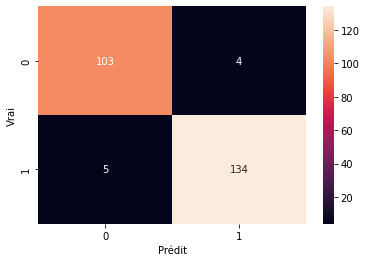

In [24]:
# Précision, rappel, score F1
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

Ces résultats suggèrent que le modèle de forêt d'isolation a une bonne capacité à distinguer entre les deux classes, avec une précision élevée, un rappel solide et un bon F1-score.

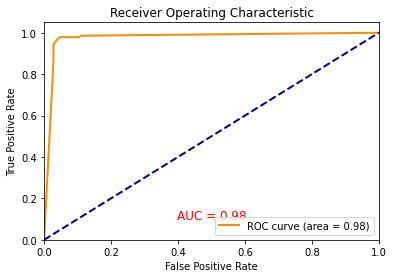

In [25]:
# scores de probabilité
y_scores = best_model2.predict_proba(X_test)[:, 1]

# taux de vrais et faux positifs
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# AUC
roc_auc = auc(fpr, tpr)

# ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# Ajouter la valeur de l'AUC
plt.text(0.5, 0.1, 'AUC = %0.2f' % roc_auc, ha='center', color='red', fontsize=12)
plt.show()



Comparons les deux modèles

En termes d'accuracy, les deux modèles sont équivalents avec une valeur de 0.93.
Pour la classe 0 (L : niveau faible d'inégalités des revenus), la forêt d'isolation a des performances légèrement meilleures en termes de precision, recall et F1-score par rapport à l'arbre de décision.
Pour la classe 1 (H : niveau élevé d'inégalités des revenus), les performances sont très similaires entre les deux modèles.
En ce qui concerne l'AUC, l'arbre de décision a une légère avance avec 0.94 par rapport à 0.93 pour la forêt d'isolation.
Dans notre cas, la forêt d'isolement est plus performante car elle permet de minimiser les erreurs de la classe 0  (L : niveau faible d'inégalité des revenus)

### Question 4

In [26]:
from sklearn.preprocessing import StandardScaler
# Standardiser les données
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

In [27]:
# Appliquer l'ACP
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [28]:
pca.explained_variance_ratio_

array([4.78688875e-01, 1.06192033e-01, 8.11870074e-02, 6.04591444e-02,
       4.88636850e-02, 4.43343510e-02, 4.20279893e-02, 3.69769077e-02,
       2.13271069e-02, 1.34186452e-02, 1.20873479e-02, 1.13012260e-02,
       8.53127599e-03, 7.06704126e-03, 6.47344688e-03, 5.72402173e-03,
       5.03742953e-03, 3.44406616e-03, 2.88422268e-03, 2.31271809e-03,
       1.27387592e-03, 3.87583040e-04])

In [29]:
# Expliquer la variance cumulée
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
explained_variance_ratio

array([0.47868887, 0.58488091, 0.66606792, 0.72652706, 0.77539074,
       0.8197251 , 0.86175308, 0.89872999, 0.9200571 , 0.93347574,
       0.94556309, 0.95686432, 0.96539559, 0.97246264, 0.97893608,
       0.9846601 , 0.98969753, 0.9931416 , 0.99602582, 0.99833854,
       0.99961242, 1.        ])

In [30]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(22)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,10.549534,48.0,48.0
1,Dim2,2.340302,11.0,58.0
2,Dim3,1.789231,8.0,67.0
3,Dim4,1.332422,6.0,73.0
4,Dim5,1.076877,5.0,78.0
5,Dim6,0.977058,4.0,82.0
6,Dim7,0.926229,4.0,86.0
7,Dim8,0.814912,4.0,90.0
8,Dim9,0.470015,2.0,92.0
9,Dim10,0.295725,1.0,93.0


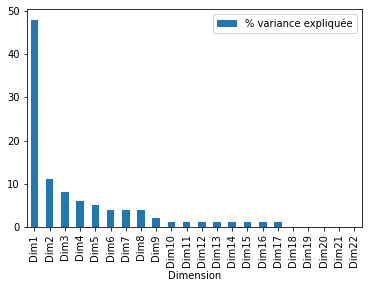

In [31]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") 
plt.show()

On remarque ici qu'avec seulement deux dimensions suffisent à expliquer 58 % de la variance des données.

### Visualiser le nuage des points dans les premiers plans retenus

In [32]:
# Transformation en DataFrame pandas
data_pca_df = pd.DataFrame({
    "Dim1": X_pca[:, 0],
    "Dim2": X_pca[:, 1],
    "Income_Inequality": y_train
})

# Print the resulting DataFrame
print(data_pca_df.head())

       Dim1      Dim2  Income_Inequality
0  2.513707 -1.321601                  1
1 -4.550458  1.028237                  0
2 -3.321047  0.501433                  0
3  4.991257  2.058722                  1
4 -0.662921 -0.191687                  0


Il est maintenant possible de représenter les données sur le premier plan factoriel. Dans ce graphique, il est important de noter le pourcentage de variance expliquée.

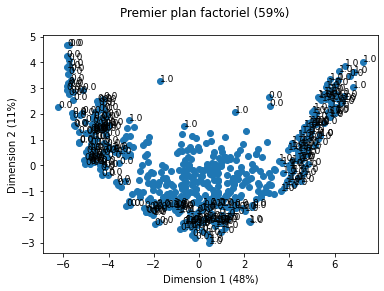

In [33]:
fig, ax = plt.subplots()

# Nuage de points en 2D
ax.scatter(data_pca_df["Dim1"], data_pca_df["Dim2"])

# Boucle sur chaque pays pour les annotations
for k in data_pca_df.iterrows():
    if (abs(k[1]['Dim1']) > 3.5) or (abs(k[1]['Dim2']) > 1.5):  
        ax.text(k[1]['Dim1'], k[1]['Dim2'], k[1]["Income_Inequality"], fontsize=9)

ax.set_xlabel("Dimension 1 (48%)")
ax.set_ylabel("Dimension 2 (11%)")

# Titre général
plt.suptitle("Premier plan factoriel (59%)")  

# Affichage du graphique
plt.show()

On pourrait aussi colorer les points en fonction de leur Income_Inequality donc.

In [34]:
# créer une palette de couleurs, basée sur Color Brewer
palette = plt.get_cmap("Dark2")
# associe une couleur à chaque Income_Inequality (cf ci-dessous)
couleurs = dict(zip(data_pca_df["Income_Inequality"].drop_duplicates(), palette(range(6))))
couleurs

{1: array([0.10588235, 0.61960784, 0.46666667, 1.        ]),
 0: array([0.85098039, 0.37254902, 0.00784314, 1.        ])}

In [35]:
position = dict(zip(couleurs.keys(), range(6)))

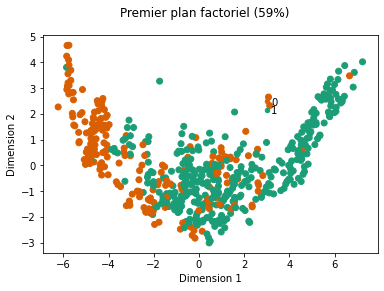

In [36]:
fig, ax = plt.subplots()

# Nuage de points en 2D avec une liste de couleurs basée sur Income_Inequality
scatter = ax.scatter(data_pca_df["Dim1"], data_pca_df["Dim2"], c=[couleurs[p] for p in data_pca_df["Income_Inequality"]])

# Boucle pour afficher la légende
for cont, coul in couleurs.items():
    ax.scatter(3, position[cont] / 3 + 2.15, c=[coul], s=20)
    ax.text(3.2, position[cont] / 3 + 2, cont)

ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")

# Titre général
plt.suptitle("Premier plan factoriel (59%)")

# Affichage du graphique
plt.show()

# Qualité de la projection des individus test

La qualité de la représentation indique à quel point l’individu est bien représenté par cet axe. Pour obtenir cette mesure, on calcule d’abord la distance (d_i) d’une observation par rapport à l’origine (dans l’espace des axes factoriels).

$$  d_i = \sqrt{\sum_{k=1}^{p} Y_{i,k}^2} $$

$$ où  Y_{i,k} représente les coordonnées de l'observation (i) sur l'axe (k).$$


In [37]:
k=2
#Représentation des individus
X_test_std = scaler.transform(X_test)
# Appliquer l'ACP sur data test
pca = PCA(n_components=k)  
X_train_pca = pca.fit_transform(X_std)
X_test_pca = pca.transform(X_test_std)

La qualité de la représentation sur l'axe \(k\) s'obtient par

$$[ Q_{obs, i, k} = \frac{Y_{i, k}^2}{d_i^2} ]$$



In [38]:
# Calculer les distances euclidiennes entre les données d'origine et les projections ACP
distances = np.linalg.norm(X_test_std - pca.inverse_transform(X_test_pca), axis=1)

# Trier les indices des données de test en fonction des distances
worst_projections_indices = np.argsort(distances)[-10:]

# Afficher les pires projections
worst_projections_data = X_test.iloc[worst_projections_indices, :]
worst_projections_data

,Country,Year,Eco1,Eco2,Eco3,Energy1,Energy2,Energy3,Health1,Health2,...,Finan3,Finan4,Finan5,Governance,Poverty,Env,Other1,Other2,Other3,anomaly_score
383,39,2013,5027.484719,10632.178678,14899.003440,69,99.830002,110.0,16.8,1.961,...,0.394028,2.246464,0.953374,-0.677003,19.912715,7.439601,24.946739,16.17,3.06795,-0.003802
824,83,2014,2346.237061,10983.483115,11763.710441,59,100.000000,263.0,9.8,1.498,...,0.288977,3.246984,0.430399,-0.397418,5.732496,5.251102,3.608321,39.95,5.87494,0.025567
827,83,2017,2246.738525,11069.074157,12649.790249,67,100.000000,281.0,8.9,1.374,...,0.222445,3.272443,0.388096,-0.488905,8.221656,3.902161,2.954212,0.00,5.41708,0.013050
826,83,2016,2185.317139,10011.935911,11415.160000,64,100.000000,281.0,9.2,1.466,...,0.196240,3.263906,0.377529,-0.581973,8.266941,4.480766,2.399426,0.00,5.00978,0.006953
441,45,2011,9506.734053,14900.694605,18609.202582,47,99.797470,88.0,18.3,2.590,...,0.559880,3.216244,0.699925,-0.510849,10.900701,14.824685,25.768821,31.61,3.49352,0.019424
825,83,2015,2124.662354,9708.287525,10631.493071,63,100.000000,263.0,9.4,1.506,...,0.209031,3.255420,0.385293,-0.524382,8.666109,4.231467,2.599115,42.90,5.74256,0.001074
106,11,2016,22810.774924,27580.723556,41464.785997,38,100.000000,85.0,7.3,2.073,...,0.505003,2.241086,0.912179,0.325291,0.000000,21.495310,9.648615,0.00,2.87000,0.004631
163,17,2013,7056.410627,6293.118691,11777.214115,58,99.996445,143.2,12.5,1.714,...,0.591315,2.545830,0.424788,-0.019736,31.311333,7.320155,2.983072,12.25,3.85251,0.008956
165,17,2015,8016.431435,6844.686057,12377.805995,64,100.000000,143.2,10.7,1.670,...,0.621550,2.599028,0.427585,0.437830,27.417901,7.145132,1.174767,12.11,3.82487,0.015051
166,17,2016,8516.513699,7149.019228,12809.694363,72,100.000000,143.2,9.9,1.772,...,0.600324,2.623665,0.427597,0.377766,26.247585,7.105480,1.052474,0.00,3.79362,0.010854


In [39]:
# Afficher les caractéristiques statistiques des pires projections
worst_projections_stats = worst_projections_data.describe()

# Afficher les indices et les caractéristiques statistiques des pires projections
print("Indices des 10 pires projections:", worst_projections_indices)
print("Caractéristiques statistiques des 10 pires projections:")
print(worst_projections_stats)

Indices des 10 pires projections: [235  20  94 239  62 214  71  40  88 121]
Caractéristiques statistiques des 10 pires projections:
         Country         Year          Eco1          Eco2          Eco3  \
count  10.000000    10.000000     10.000000     10.000000     10.000000   
mean   47.800000  2014.600000   6983.730454  11517.320152  15839.786025   
std    32.044414     1.837873   6277.735880   6186.869227   9287.750065   
min    11.000000  2011.000000   2124.662354   6293.118691  10631.493071   
25%    17.000000  2013.250000   2271.613159   7788.836302  11767.086359   
50%    42.000000  2015.000000   6041.947673  10322.057294  12513.798122   
75%    83.000000  2016.000000   8391.493133  11047.676396  14376.676170   
max    83.000000  2017.000000  22810.774924  27580.723556  41464.785997   

         Energy1     Energy2     Energy3    Health1    Health2  ...  \
count  10.000000   10.000000   10.000000  10.000000  10.000000  ...   
mean   60.100000   99.962392  180.060000  11.28000

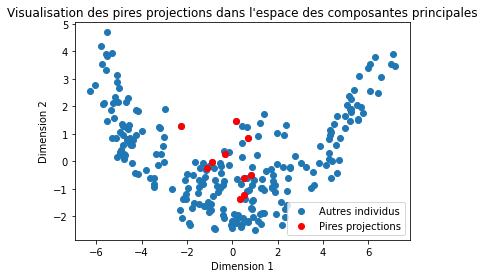

In [40]:
# Visualisation des individus dans l'espace des composantes principales
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], label='Autres individus')
plt.scatter(X_test_pca[worst_projections_indices, 0], X_test_pca[worst_projections_indices, 1], label='Pires projections', color='red')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Visualisation des pires projections dans l\'espace des composantes principales')
plt.legend()
plt.show()

## Comparaison avec les résultats obtenus par les forêts d'isolement

In [41]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(X_train_pca)

# Prédire les anomalies dans les données de test
predictions_if = isolation_forest.predict(X_test_pca)

# Trouver les indices des 10 individus les plus mal projetés par Isolation Forest
worst_if_indices = np.argsort(predictions_if)[-10:]

print('Indices des 10 individus les plus mal projetés par Isolation Forest',worst_if_indices)

Indices des 10 individus les plus mal projetés par Isolation Forest [ 88  89  90  91  92  93  94  96  99 245]


In [42]:
print("Indices des 10 pires projections:", worst_projections_indices)

Indices des 10 pires projections: [235  20  94 239  62 214  71  40  88 121]


Les "individus les plus mal projetés par l'Isolation Forest" sont ceux que le modèle considère comme les plus anormaux dans l'espace d'origine. Les "pires projections après l'ACP" sont les individus dont la représentation dans l'espace réduit ne capture pas bien la structure des données. Ces deux métriques peuvent fournir des indications sur les points qui sont problématiques ou inhabituels dans différents contextes.

5. Mettre en œuvre une AFD sur $\mathbb{R}^p$ :
(a) En utilisant les données train de la partie 2(a):
i. A partir de votre code sous $\mathrm{R}$ ou Python : fournir les matrices $V$ matrice $B$ et la matrice $W$ et la matrice de variance-covariance totale $\Sigma$.

ii. Vous disposez d'un script qui vous permet de 1) calculer la diagonalisation de la matrice $\Sigma^{-1} B$ ou plus exactement obtenir les valeurs propres et les vecteurs associés $U, 2$ ) de faire la projection des individus dans ce nouvel espace. Pour finaliser l'AFD vous pouvez utiliser un de packages sous $\mathrm{R}$ disponibles.

iii. Tester la réduction par AFD : tester plusieurs règles pour sélectionner la part d'inertie expliquée et fournir la dimension $k<p$ de réduction retenue.

iv. Visualisez le nuage des $n$ points dans les premiers plans retenus en mettant une couleur associée à chacune des classes.

(b) En utilisant les données test de la partie 2(a) : donner la qualité de la projection des individus test sur les $k$ composantes : quels sont les 10 individus les plus mal projetés dans le nuage?Comparer vos résultats obtenus par l'ACP.


6. Mise en ceuvre de l'AFD prédictive :

(a) En utilisant le modèle entraîné de la partie 5(a), mettre en œuvre la fonction discriminante prédictive sur les données test et comparer avec la matrice de confusion de l'arbre de décision.

(b) Puis mettre en cuvre un arbre de décision et une AFD sur les données réduites après ACP (partie 4 ) et comparer les matrices de confusion sur les données tests. Comparer vos résultats obtenus par l'arbre de décision et l'AFD des parties (2) et (5).

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


data=pd.read_csv('Income_Inequality.csv',sep=';')
np.random.seed(1234)


X = data.drop('Income_Inequality', axis=1)
y = data['Income_Inequality']
y = np.where(np.array(y) == 'H', 1, 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

i. A partir de votre code sous $\mathrm{R}$ ou Python : fournir les matrices $V$ matrice $B$ et la matrice $W$ et la matrice de variance-covariance totale $\Sigma$.

In [44]:
X_train.shape

(609, 21)

In [45]:
data.columns

Index(['Country', 'Year', 'Income_Inequality', 'Eco1', 'Eco2', 'Eco3',
       'Energy1', 'Energy2', 'Energy3', 'Health1', 'Health2', 'Finan1',
       'Finan2', 'Finan3', 'Finan4', 'Finan5', 'Governance', 'Poverty', 'Env',
       'Other1', 'Other2', 'Other3'],
      dtype='object')

### Step 1: Computing the d-dimensional mean vectors
In this first step, we will start off with a simple computation of the mean vectors $\boldsymbol{m}_i,(i=0,1)$ of the 2 different classes:
$$
\boldsymbol{m}_i=\left[\begin{array}{l}
\mu_{\omega_i \text { (H) }} \\
\mu_{\omega_i \text { (L) }}
\end{array}\right], \quad \text { with } \quad i=0,1
$$

In [46]:
mean_vectors = []
for cl in range(0,2):
    mean_vectors.append(np.mean(X_train[y_train==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 0: Country       4.215126e+01
Year          2.014613e+03
Eco1          2.966825e+04
Eco2          2.402376e+04
Eco3          3.439637e+04
Energy1       6.519328e+01
Energy2       9.845135e+01
Energy3       9.501496e+01
Health1       9.966387e+00
Health2       1.903887e+00
Finan1        5.566987e-01
Finan2        4.750898e+06
Finan3        7.616387e-01
Finan4        3.290118e+00
Finan5        7.469976e-01
Governance    8.204906e-01
Poverty       1.022052e+01
Env           7.595755e+00
Other1        3.736814e+00
Other2        1.088567e+01
Other3        5.063388e+00
dtype: float64

Mean Vector class 1: Country       4.215126e+01
Year          2.014613e+03
Eco1          2.966825e+04
Eco2          2.402376e+04
Eco3          3.439637e+04
Energy1       6.519328e+01
Energy2       9.845135e+01
Energy3       9.501496e+01
Health1       9.966387e+00
Health2       1.903887e+00
Finan1        5.566987e-01
Finan2        4.750898e+06
Finan3        7.616387e-01
Finan4        3.290118e+

In [47]:
mean_vectors=[list(mean_vectors[0].values),list(mean_vectors[1].values)]
mean_vectors=[np.array(mean_vectors[0]),np.array(mean_vectors[1])]

### Step 2: Computing the Scatter Matrices
Now, we will compute the two $4 \times 4$-dimensional matrices: The within-class and the between-class scatter matrix
2.1 Within-class scatter matrix $S_W$

The within-class scatter matrix $S_W$ is computed by the following equation:
$$
S_W=\sum_{i=1}^c S_i
$$
where
$$
S_i=\sum_{\boldsymbol{x} \in D_i}^n\left(\boldsymbol{x}-\boldsymbol{m}_i\right)\left(\boldsymbol{x}-\boldsymbol{m}_i\right)^T
$$
(scatter matrix for every class)
and $\boldsymbol{m}_i$ is the mean vector
$$
\boldsymbol{m}_i=\frac{1}{n_i} \sum_{\boldsymbol{x} \in D_i}^n \boldsymbol{x}_k
$$

In [48]:
S_W = np.zeros((X_train.shape[1],X_train.shape[1]))
for cl,mv in zip(range(0,2), mean_vectors):
    class_sc_mat = np.zeros((21,21))                  # scatter matrix for every class
    for row in X_train[y_train == cl].values:
        row, mv = row.reshape(21,1), mv.reshape(21,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
#print('within-class Scatter Matrix:\n', S_W)

$2.1 \mathrm{~b}$
Alternatively, we could also compute the class-covariance matrices by adding the scaling factor $\frac{1}{N-1}$ to the within-class scatter matrix, so that our equation becomes
$$
\begin{aligned}
& \Sigma_i=\frac{1}{N_i-1} \sum_{\boldsymbol{x} \in D_i}^n\left(\boldsymbol{x}-\boldsymbol{m}_i\right)\left(\boldsymbol{x}-\boldsymbol{m}_i\right)^T \\
& \text { and } S_W=\sum_{i=1}^c\left(N_i-1\right) \Sigma_i
\end{aligned}
$$
where $N_i$ is the sample size of the respective class (here: 50 ), and in this particular case, we can drop the term $\left(N_i-1\right)$ since all classes have the same sample size.

However, the resulting eigenspaces will be identical (identical eigenvectors, only the eigenvalues are scaled differently by a constant factor).

#### 2.2 Between-class scatter matrix $S_B$

The between-class scatter matrix $S_B$ is computed by the following equation:
$$
S_B=\sum_{i=1}^c N_i\left(\boldsymbol{m}_i-\boldsymbol{m}\right)\left(\boldsymbol{m}_i-\boldsymbol{m}\right)^T
$$
where
$\boldsymbol{m}$ is the overall mean, and $\boldsymbol{m}_i$ and $N_i$ are the sample mean and sizes of the respective classes.

In [49]:
overall_mean = np.mean(X_train, axis=0)
overall_mean.values

array([4.49359606e+01, 2.01446305e+03, 1.60455307e+04, 1.56412358e+04,
       2.15803765e+04, 5.13087028e+01, 8.50329249e+01, 9.06160755e+01,
       2.72868637e+01, 2.64644417e+00, 4.03750118e-01, 4.49575817e+06,
       6.03863303e-01, 2.73014616e+00, 6.40844401e-01, 1.97450062e-01,
       2.63371896e+01, 4.89703611e+00, 5.17559830e+00, 1.51381445e+01,
       4.57783915e+00])

In [50]:
overall_mean = np.mean(X_train, axis=0).values

S_B = np.zeros((21,21))
for i,mean_vec in enumerate(mean_vectors):  
    n = X_train[y_train==i].shape[0]
    mean_vec = mean_vec.reshape(21,1) # make column vector
    overall_mean = overall_mean.reshape(21,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

#print('between-class Scatter Matrix:\n', S_B)

In [51]:
S_B.shape

(21, 21)

### Step 3: Solving the generalized eigenvalue problem for the matrix $V^{-1} S_B$

Next, we will solve the generalized eigenvalue problem for the matrix $V^{-1} S_B$ to obtain the linear discriminants.

* $V=S_B+S_W$

In [52]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W+S_B).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(21,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 2.12723668e-03]
 [ 1.35681943e-02]
 [-1.38607885e-05]
 [ 3.79300078e-05]
 [-6.47687888e-06]
 [ 5.85737084e-04]
 [ 8.21063726e-03]
 [-1.68104676e-03]
 [-3.73906538e-03]
 [-9.50719317e-02]
 [-4.59027043e-01]
 [ 4.53671724e-09]
 [ 6.16951836e-01]
 [-6.17870610e-01]
 [ 6.15627296e-02]
 [-1.04435603e-01]
 [ 2.98794081e-02]
 [ 1.30097135e-02]
 [ 1.26136575e-04]
 [ 6.50273030e-04]
 [-4.27717431e-02]]
Eigenvalue 1: 6.20e-01

Eigenvector 2: 
[[-1.19104189e-03]
 [ 9.66943526e-02]
 [ 6.80889437e-05]
 [ 7.75185547e-06]
 [-1.22015371e-04]
 [ 3.96906060e-03]
 [ 2.08887845e-02]
 [ 1.43455579e-03]
 [ 2.21829390e-03]
 [ 7.74197312e-02]
 [ 6.35635168e-02]
 [-1.98588905e-09]
 [-8.93137238e-01]
 [ 3.24034884e-01]
 [-2.35163362e-01]
 [ 1.42870197e-01]
 [-8.00249653e-03]
 [ 3.49202413e-02]
 [ 6.48662086e-03]
 [ 2.40040233e-03]
 [-2.04406752e-02]]
Eigenvalue 2: 3.01e-15

Eigenvector 3: 
[[-2.18146650e-04]
 [ 3.04082759e-02]
 [-7.27527910e-06]
 [-3.94251144e-05]
 [ 5.00022245e-06]
 [ 5.555

Note
Depending on which version of NumPy and LAPACK we are using, we may obtain the matrix $\mathbf{W}$ with $\mathrm{i}$ signs flipped. Please note that this is not an issue; if $\mathbf{v}$ is an eigenvector of a matrix $\Sigma$, we have
$$
\Sigma \mathbf{v}=\lambda \mathbf{v}
$$

Here, $\lambda$ is the eigenvalue, and $\mathbf{v}$ is also an eigenvector that thas the same eigenvalue, since
$$
\operatorname{Sigma}(-\mathbf{v})=--\mathbf{v} \Sigma=-\lambda \mathbf{v}=\lambda(-\mathbf{v})
$$

After this decomposition of our square matrix into eigenvectors and eigenvalues, let us briefly recapitulate how we can interpret those results. As we remember from our first linear algebra class in high school or college, both eigenvectors and eigenvalues are providing us with information about the distortion of a linear transformation: The eigenvectors are basically the direction of this distortion, and the eigenvalues are the scaling factor for the eigenvectors that describing the magnitude of the distortion.

If we are performing the LDA for dimensionality reduction, the eigenvectors are important since they wil form the new axes of our new feature subspace; the associated eigenvalues are of particular interest since they will tell us how "informative" the new "axes" are.

Let us briefly double-check our calculation and talk more about the eigenvalues in the next section.
Checking the eigenvector-eigenvalue calculation
A quick check that the eigenvector-eigenvalue calculation is correct and satisfy the equation:
$$
\boldsymbol{A v}=\lambda \boldsymbol{v}
$$
where
$$
\begin{aligned}
& \boldsymbol{A}=V^{-1} S_B \\
& \boldsymbol{v}=\text { Eigenvector } \\
& \lambda=\text { Eigenvalue }
\end{aligned}
$$

In [53]:
len(eig_vals)

21

### Step 4: Selecting linear discriminants for the new feature subspace # 
4.1. Sorting the eigenvectors by decreasing eigenvalues # 
Remember from the introduction that we are not only interested in merely projecting the data into a subspace that improves the class separability, but also reduces the dimensionality of our feature space, (where the eigenvectors will form the axes of this new feature subspace).

However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1.

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top $k$
 eigenvectors.

In [54]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

0.6195440087721571
3.0117725501197976e-15
2.437117659321142e-15
2.437117659321142e-15
1.7543428538626059e-15
9.105361680428192e-16
8.227048427355723e-16
8.227048427355723e-16
6.673252718576029e-16
6.673252718576029e-16
4.330154199467263e-16
3.472510674718752e-16
3.472510674718752e-16
2.7625101512500725e-16
2.0635557531220523e-16
1.2352954953522923e-16
9.255127094797362e-17
5.332036517752791e-17
2.9908560240436603e-17
2.5477879806010358e-17
4.302134258793048e-18


Note

If we take a look at the eigenvalues, we can already see that 20 eigenvalues are close to 0. The reason why these are close to 0 is not that they are not informative but it’s due to floating-point imprecision. In fact, these 20 eigenvalues should be exactly zero: In LDA, the number of linear discriminants is at most c−1 where c is the number of class labels.

Note that in the rare case of perfect collinearity (all aligned sample points fall on a straight line), the covariance matrix would have rank one, which would result in only one eigenvector with a nonzero eigenvalue.

Now, let’s express the “explained variance” as percentage:

In [55]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%
eigenvalue 14: 0.00%
eigenvalue 15: 0.00%
eigenvalue 16: 0.00%
eigenvalue 17: 0.00%
eigenvalue 18: 0.00%
eigenvalue 19: 0.00%
eigenvalue 20: 0.00%
eigenvalue 21: 0.00%


The first eigenpair is by far the most informative one, and we won’t loose much information if we would form a 1D-feature spaced based on this eigenpair.

4.2. Choosing $k$ eigenvectors with the largest eigenvalues

After sorting the eigenpairs by decreasing eigenvalues, it is now time to construct our $d \times k$-dimensional eigenvector matrix $\boldsymbol{W}$ (here $21 \times 2$ : based on the 2 most informative eigenpairs) and thereby reducing the initial 21-dimensional feature space into a 2-dimensional feature subspace.


### Step 5: Transforming the samples onto the new subspace

In the last step, we use the $21 \times 2$-dimensional matrix $\boldsymbol{W}$ that we just computed to transform our samples onto the new subspace via the equation
$$
\boldsymbol{Y}=\boldsymbol{X} \times \boldsymbol{W}
$$
(where $\boldsymbol{X}$ is a $n \times d$-dimensional matrix representing the $n$ samples, and $\boldsymbol{Y}$ are the transformed $n \times k$ -dimensional samples in the new subspace).

In [56]:
W = np.hstack((eig_pairs[0][1].reshape(21,1), eig_pairs[1][1].reshape(21,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 2.12723668e-03 -1.19104189e-03]
 [ 1.35681943e-02  9.66943526e-02]
 [-1.38607885e-05  6.80889437e-05]
 [ 3.79300078e-05  7.75185547e-06]
 [-6.47687888e-06 -1.22015371e-04]
 [ 5.85737084e-04  3.96906060e-03]
 [ 8.21063726e-03  2.08887845e-02]
 [-1.68104676e-03  1.43455579e-03]
 [-3.73906538e-03  2.21829390e-03]
 [-9.50719317e-02  7.74197312e-02]
 [-4.59027043e-01  6.35635168e-02]
 [ 4.53671724e-09 -1.98588905e-09]
 [ 6.16951836e-01 -8.93137238e-01]
 [-6.17870610e-01  3.24034884e-01]
 [ 6.15627296e-02 -2.35163362e-01]
 [-1.04435603e-01  1.42870197e-01]
 [ 2.98794081e-02 -8.00249653e-03]
 [ 1.30097135e-02  3.49202413e-02]
 [ 1.26136575e-04  6.48662086e-03]
 [ 6.50273030e-04  2.40040233e-03]
 [-4.27717431e-02 -2.04406752e-02]]


In [57]:
W.shape

(21, 2)

In [58]:
X_lda = X_train.dot(W)
X_lda.shape

(609, 2)

In [59]:
X_lda.iloc[:,0].values.real[y_train == 1].shape

(371,)

In [60]:
label_dict = {0: 'L', 1: 'H'}

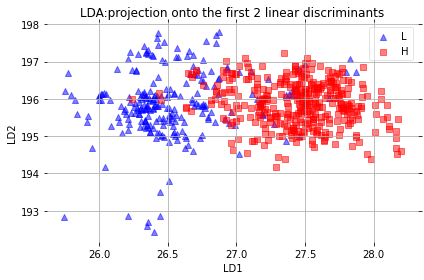

In [61]:
def plot_step_lda():
    ax = plt.subplot(111)
    for label, marker, color in zip(range(0, 2), ('^', 's'), ('blue', 'red')):
        plt.scatter(
            x=X_lda.iloc[:, 0].values.real[y_train == label],
            y=X_lda.iloc[:, 1].values.real[y_train == label],
            marker=marker,
            color=color,
            alpha=0.5,
            label=label_dict[label]
        )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA:projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(
        axis="both",
        which="both",
        bottom="off",
        top="off",
        labelbottom="on",
        left="off",
        right="off",
        labelleft="on"
    )

    # remove axis spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    plt.grid()
    plt.tight_layout()
    plt.show()

plot_step_lda()

In [62]:
tot = sum(eig_vals.real)
discr = [(i / tot) for i in sorted(eig_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

In [63]:
eig_vals=eig_vals.astype('float')

C:\Users\user\AppData\Local\Temp\ipykernel_10756\3153518227.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vals=eig_vals.astype('float')


In [64]:
# Calcul de la part de la variance expliquée par chaque valeur propre
eig_vals = np.array(eig_vals)
total_variance = sum(eig_vals)
variance_explained = [(i / total_variance) for i in sorted(eig_vals, reverse=True)]

# Cumulative variance explained
cumulative_variance_explained = np.cumsum(variance_explained)

# Sélectionner le nombre de composantes pour une variance cumulée souhaitée (ex : 95%)
k = np.argmax(cumulative_variance_explained >= 0.95) + 1

k

1

In [65]:
'''plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance_explained)+1), cumulative_variance_explained, marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée expliquée')
plt.title('Analyse du Coude pour la Sélection de Composantes LDA')
plt.show()'''

"plt.figure(figsize=(8, 4))\nplt.plot(range(1, len(cumulative_variance_explained)+1), cumulative_variance_explained, marker='o')\nplt.xlabel('Nombre de composantes')\nplt.ylabel('Variance cumulée expliquée')\nplt.title('Analyse du Coude pour la Sélection de Composantes LDA')\nplt.show()"

la première composante de l'Analyse Discriminante Linéaire (LDA) capture la quasi-totalité de la variance expliquée. Cela signifie que vous pouvez réduire la dimensionnalité des données à  k=1 tout en conservant l'essentiel de l'information qui permet de distinguer les classes. Cela est cohérent avec le principe de l'LDA, qui vise à maximiser la séparation entre les classes. Dans la plupart des cas, en particulier lorsque les classes sont bien séparées, la première composante linéaire discriminante suffit pour obtenir une bonne séparation.

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


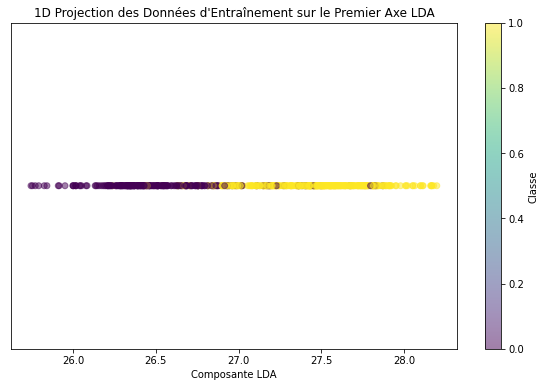

In [66]:
# Project the training data onto the LDA axis
X_lda_1d = X_train.dot(W[:, 0])

# Plot the data with labels
plt.figure(figsize=(10, 6))
plt.scatter(X_lda_1d, [0] * len(X_lda_1d), c=y_train, cmap='viridis', alpha=0.5)
plt.title('1D Projection des Données d\'Entraînement sur le Premier Axe LDA')
plt.xlabel('Composante LDA')
plt.yticks([])
plt.colorbar(label='Classe')
plt.show()

In [67]:
max_index = np.argmax(eig_vals.astype('float'))

In [68]:
# g_k pour k = 0 et 1
g1 = np.mean(X_train[y_train==0]).values  # le centre de gravité réel de la classe 0
g2 = np.mean(X_train[y_train==1]).values  # le centre de gravité réel de la classe 1

# Vecteur propre associé à la première valeur propre (a_s) pour s = 1
a1 = eig_vecs.astype('float')[max_index]

V = S_W+S_B

# Inverse de la matrice V
V_inv = np.linalg.inv(V)

# Nombre d'individus dans chaque classe (l_k)
l1 = X_train[y_train==0].shape[0]  # le nombre réel d'individus dans la classe 1
l2 = X_train[y_train==1].shape[0]  # le nombre réel d'individus dans la classe 2

# Nombre total d'individus (n)
n = l1 + l2

# Valeurs propres de la matrice Sigma^-1 B (lambda_s)
lambda_s = eig_vals.astype('float') # Remplacez par vos valeurs propres réelles

# Calcul de la qualité de représentation d'un nuage par un axe
quality_representation = lambda_s[0] / sum(lambda_s)

# Contribution absolue du centre de gravité g_k à l'axe s
contrib_abs_g1 = (1/n) * (np.dot(a1.T, np.dot(V_inv, g1)))**2
contrib_abs_g2 = (1/n) * (np.dot(a1.T, np.dot(V_inv, g2)))**2

# Contribution relative du centre de gravité g_k à l'axe s
contrib_rel_g1 = (l1 / (n * lambda_s[0])) * (np.dot(a1.T, np.dot(V_inv, g1)))**2
contrib_rel_g2 = (l2 / (n * lambda_s[0])) * (np.dot(a1.T, np.dot(V_inv, g2)))**2

# Affichage des résultats
print("Qualité de représentation sur l'axe 1:", quality_representation)
print("Contribution absolue du centre de gravité de la classe 1 à l'axe 1:", contrib_abs_g1)
print("Contribution absolue du centre de gravité de la classe 2 à l'axe 1:", contrib_abs_g2)
print("Contribution relative du centre de gravité de la classe 1 à l'axe 1:", contrib_rel_g1)
print("Contribution relative du centre de gravité de la classe 2 à l'axe 1:", contrib_rel_g2)

# Pour trouver les 10 individus les plus mal projetés sur l'axe, vous devez calculer la distance de chaque
# individu test à son centre de gravité de classe respectif dans l'espace projeté et sélectionner les 10 plus grandes distances.
# Supposons que X_test_projected représente les projections des individus test sur l'axe discriminant LDA.
X_test_projected = X_test.dot(W[:, 0])

# Calculer les distances pour chaque classe et trouver les 10 individus les plus éloignés
distances_g1 = np.abs(X_test_projected[y_test==0] - g1[0])  # Pour la classe 0
distances_g2 = np.abs(X_test_projected[y_test==1] - g2[0])  # Pour la classe 1


# Utiliser l'index de X_test pour obtenir les vrais indices des individus
indices_classe_0 = X_test.index[y_test == 0]
indices_classe_1 = X_test.index[y_test == 1]

# Calculer les distances pour chaque individu de l'ensemble de test par rapport à leur centre de gravité de classe
distances_g1 = np.abs(X_test_projected[indices_classe_0] - g1[0])  # Pour la classe 0
distances_g2 = np.abs(X_test_projected[indices_classe_1] - g2[0])  # Pour la classe 1

Qualité de représentation sur l'axe 1: 1.0000000000000004
Contribution absolue du centre de gravité de la classe 1 à l'axe 1: 2.4113555294338734e-06
Contribution absolue du centre de gravité de la classe 2 à l'axe 1: 2.41321611443025e-06
Contribution relative du centre de gravité de la classe 1 à l'axe 1: 0.0009263306688134238
Contribution relative du centre de gravité de la classe 2 à l'axe 1: 0.0014451002120543118


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_10756\1550750229.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  a1 = eig_vecs.astype('float')[max_index]


In [69]:
# Trouver les indices des 10 plus grandes distances dans l'ensemble de test original
indices_g1 = indices_classe_0[np.argsort(-distances_g1, axis=0)[:10]].values
indices_g2 = indices_classe_1[np.argsort(-distances_g2, axis=0)[:10]].values

# Affichage des indices des 10 individus les plus mal projetés pour chaque classe
print("Indices des 10 individus les plus mal projetés de la classe 0:", indices_g1)
print("Indices des 10 individus les plus mal projetés de la classe 1:", indices_g2)

Indices des 10 individus les plus mal projetés de la classe 0: [146 147 148 143 609 375 230 602 670 216]
Indices des 10 individus les plus mal projetés de la classe 1: [398 397 395 394 393  99  96 738 421 422]


### A comparison of PCA and LDA

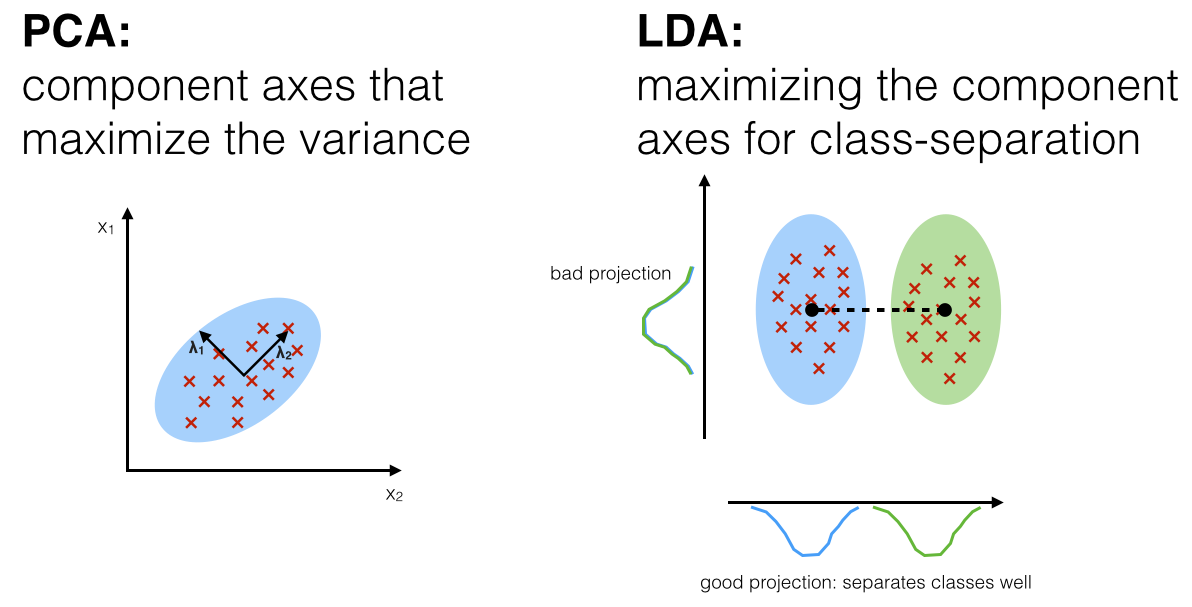

In [70]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X_train)

In [71]:
x=X_pca[:,0][y_train == 0]

In [72]:
def plot_pca():

    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=X_pca[:,0][y_train == label],
                y=X_pca[:,1][y_train == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()

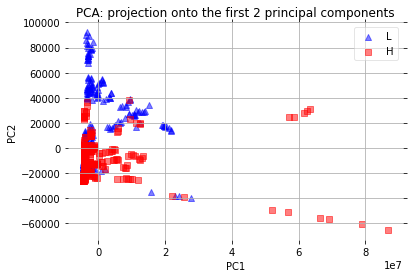

In [73]:
plot_pca()

Our LDA plot :

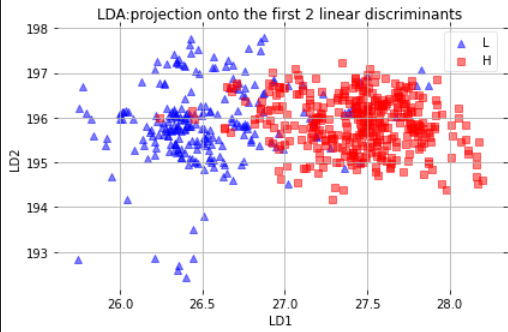

The two plots above nicely confirm what we have discussed before: Where the PCA accounts for the most variance in the whole dataset, the LDA gives us the axes that account for the most variance between the individual classes.

In [74]:
# Entraînez le modèle LDA sur vos données d'entraînement
lda_model = LDA()
lda_model.fit(X_lda.astype('float'), y_train)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


LinearDiscriminantAnalysis()

In [75]:
X_test_lda = X_test.dot(W)
X_test_lda=X_test_lda.values.astype('float')
X_lda.shape

C:\Users\user\AppData\Local\Temp\ipykernel_10756\681174234.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  X_test_lda=X_test_lda.values.astype('float')


(609, 2)

In [76]:
# Prédiction avec le modèle LDA entraîné
y_pred_lda = lda_model.predict(X_test_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
conf_matrix_lda

array([[ 80,  10],
       [ 23, 148]], dtype=int64)

#### Partie 6(b)

In [77]:
# Entraînement de l'arbre de décision sur les données réduites après ACP
tree_model = DecisionTreeClassifier()
tree_model.fit(X_pca, y_train)

DecisionTreeClassifier()

In [78]:
X_test_pca = sklearn_pca.fit_transform(X_test)

In [79]:
# Prédiction avec l'arbre de décision sur les données de test réduites après ACP
y_pred_tree = tree_model.predict(X_test_pca)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_tree

array([[64, 26],
       [77, 94]], dtype=int64)


         END